<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('airbnb.csv', encoding='latin-1')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
data.isnull().values.any() # Este código nos devolverá True si hay algún valor NaN en nuestro DataFrame.

True

In [7]:
#data=data.dropna()
#data=data.fillna(value=0)

Clasificar los apartamentos como “Muy Malos”, “Malos”, “Regulares”, “Buenos” y “Muy Buenos”,

La columna de reseñas por mes, se dividirán en 3 rangos iguales, después dependiendo del valor concreto que 
tenga cada apartamento se le asignarán las etiquetas: “Baja”, “Media” y ”Alta”. 

In [8]:
from statistics import median

data['reviews_per_month'] = data['reviews_per_month'].replace('NaN','0.00')

print(min(data['reviews_per_month']))
print(median(data['reviews_per_month']))
print(max(data['reviews_per_month']),"\n")


Reseña_Baja = data['reviews_per_month'].apply(lambda val: val  <1 )
Reseña_Media = data['reviews_per_month'].apply(lambda val: val>=1) & data['reviews_per_month'].apply(lambda val: val<=4)
Reseña_Alta = data['reviews_per_month'].apply(lambda val: val >4)

Num_Reseña_Baja=print(sum(bool(x) for x in Reseña_Baja))
Num_Reseña_Media=print(sum(bool(x) for x in Reseña_Media))
Num_Reseña_Alta=print(sum(bool(x) for x in Reseña_Alta))


0.01
0.18
58.5 

22042
13814
2987


Para la columna que indica el 
número de días que está disponible asignaremos las etiquetas de menor valor a mayor de la siguiente manera: 
“Poco disponible”, “Disponible normalmente” y “Altamente disponible”. 

In [9]:
from statistics import median

data['availability_365'] = data['availability_365'].replace('NaN','0.00')

Poco_Disponible = data['availability_365'].apply(lambda val: val  <30 )
Disponible_Normalmente = data['availability_365'].apply(lambda val: val>=30) & data['availability_365'].apply(lambda val: val<=120)
Altamente_Disponible = data['availability_365'].apply(lambda val: val >120)

print(min(data['availability_365']))
print(median(data['availability_365']))
print(max(data['availability_365']),"\n")

Num_Poco_Disponible=print(sum(bool(x) for x in Poco_Disponible))
Num_Disponible_Normalmente=print(sum(bool(x) for x in Disponible_Normalmente)) 
Num_Altamente_Disponible=print(sum(bool(x) for x in Altamente_Disponible))



0
45
365 

22699
7894
18302


Finalmente crearemos una columna 
para clasificar los apartamentos, teniendo en cuenta las siguientes reglas:

• Si Reseñas es Baja y Disponibilidad es “Poco disponible” -> “Bueno”

• Si Reseñas es Media y Disponibilidad es “Poco disponible” -> “Bueno” 

• Si Reseñas es Alta y Disponibilidad es “Poco disponible” -> “Muy Bueno” 

• Si Reseñas es Baja y Disponibilidad es “Disponible normalmente” -> “Regular” 

• Si Reseñas es Media y Disponibilidad es “Disponible normalmente” -> “Regular” 

• Si Reseñas es Alta y Disponibilidad es “Disponible normalmente” -> “Bueno” 

• Si Reseñas es Baja y Disponibilidad es “Altamente disponible” -> “Malo” 

• Si Reseñas es Media y Disponibilidad es “Altamente disponible” -> “Malo” 

• Si Reseñas es alta y Disponibilidad es “Altamente disponible” -> “Muy malo” 

In [10]:
Muy_Malo= (Num_Reseña_Alta and Altamente_Disponible)
Malo = (Num_Reseña_Baja and Altamente_Disponible) or (Num_Reseña_Media and Altamente_Disponible)
Regular = (Num_Reseña_Baja and Disponible_Normalmente) or (Num_Reseña_Media and Disponible_Normalmente)
Bueno = (Num_Reseña_Baja and Poco_Disponible) or (Num_Reseña_Media and Poco_Disponible) or (Num_Reseña_Alta and Disponible_Normalmente)
Muy_Bueno =  (Num_Reseña_Alta and Poco_Disponible)


#Num_Muy_Malo=print(sum(bool(x) for x in Muy_Malo))
#Num_Malo=print(sum(bool(x) for x in Malo))
#Num_Regular=print(sum(bool(x) for x in Regular))
#Num_Bueno=print(sum(bool(x) for x in Bueno))
#Num_Muy_Bueno=print(sum(bool(x) for x in Muy_Bueno))



Por  último,  se  intuye  que  la  tendencia  a  dejar  reseñas  en  las  apps  que  prestan  servicios,  ha 
aumentado  en  los  últimos  años.  Decide  que  diagrama  es  más  útil  para  este  caso.  Dibújalo  y  realiza  una 
interpretación del mismo. Tomaremos la fecha de la última reseña como el dato útil para realizar dicho caso. 

TypeError: ignored

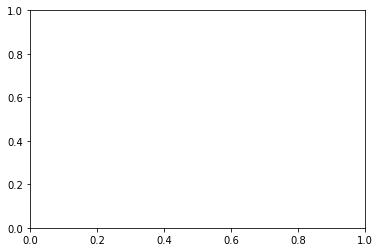

In [11]:
#data=data.dropna()
particiones = np.arange(0, 7, 0.5)
#plt.hist(data['number_of_reviews'], data['last_review'])
plt.bar(data['number_of_reviews'], data['last_review'])   
plt.xlabel("Año de la reseña")
plt.ylabel("N° de reseñas")
plt.show()